# Check npx384 traces in ks3

author: steeve.laquitaine@epfl.ch  
date: 2023.10.11
last modified: 2023.10.11  
status:  OK
display-status: up-to-date  
regression: None  

Purpose: 
- We use Buccino traces as reference, as it has high sorting accuracy.
- does 40 KHz improve spike sorting ?


Kilosort3 operations:
- read raw traces
- pad traces
- high-bass filter + detrending
- whitening

[TODO]:
- check that the raw and wired (unpreprocessed) traces output by Spikeinterface are same as the raw traces read in Kilosort3 before preprocessing.

## Setup

setup `npx_10_384ch_unit_classes`

Trace plots are created at different steps of trace preprocessing in `/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces/preProcess/preprocessDataSub.m`

and `/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces_buccino/preProcess/preprocessDataSub.m`

In [31]:
%load_ext autoreload
%autoreload 2

import os
import scipy
from matplotlib import pyplot as plt
import numpy as np

# move to project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/sfn_2023/"
os.chdir(PROJ_PATH)
from src.nodes.dataeng.silico import probe_wiring, recording
from src.nodes.utils import get_config
from src.nodes.prepro import preprocess

# SETUP PARAMETERS
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_08_17"      # disconnected 
data_conf_384, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()

# SET KILOSORT3 INSPECTION FIGURE READ PATHS
# npx384
NPX32_BINARY_FILE = "/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces_384/KS3_output/recording.dat"
RAW_TRACE_IN_KS3_PATH = "/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces_384/KS3_output/raw_trace_first_batch.mat"
PREP_TRACE_BY_KS3_PATH = "/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces_384/KS3_output/prep_trace_first_batch.mat"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-10-12 17:14:34,842 - root - utils.py - get_config - INFO - Reading experiment config.
2023-10-12 17:14:34,911 - root - utils.py - get_config - INFO - Reading experiment config. - done


## Check raw and preprocessed traces read in Kilosort 3

### For npx384 (2023.08.17)

A batch size is 384 electrodes by 65792 timepoints.

To save the traces read in KS3 for inspection, Run in terminal: 
```bash
bash /gpfs/bbp.cscs.ch/project/proj68/home/laquitai/sfn_2023/src/pipes/controls/check_traces_in_ks3_384.sh
```

## Plot

### npx384 raw - first batch

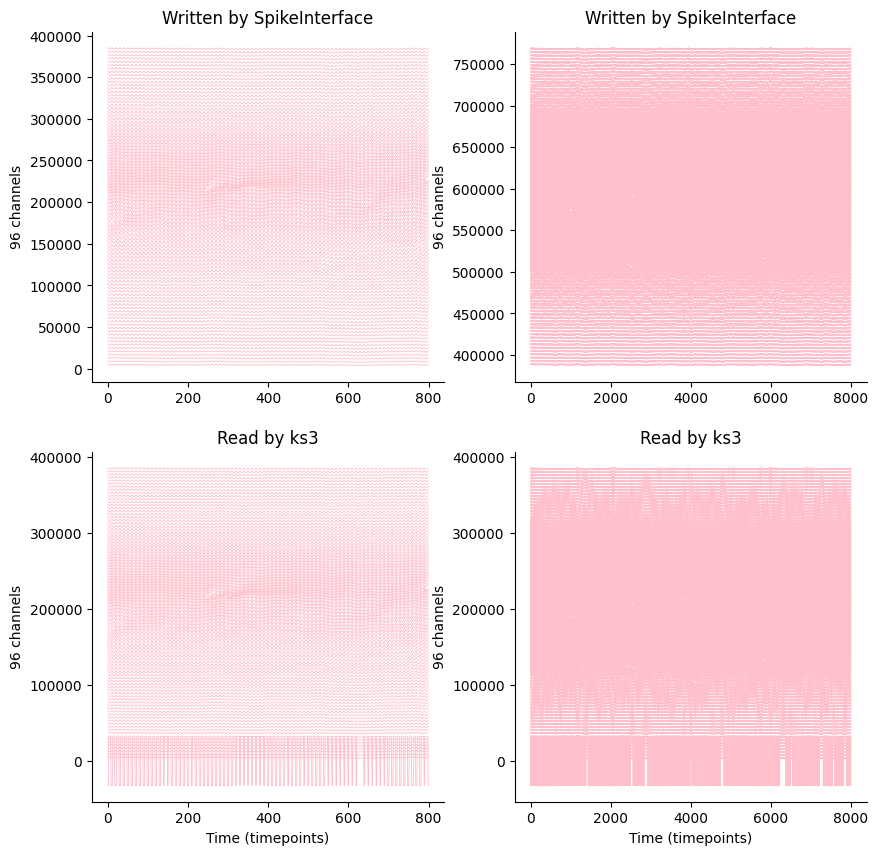

In [23]:
# plot 32 contacts x 5 ms (like Trautmann et al 2023)
sampfreq = 40000    # Hz
duration = 20       # in ms
n_timepoints = int(duration*sampfreq/1000)
Y_STEP = 4000
LINEWIDTH = 0.6

# WRITTEN BY SPIKEINTERFACE
Recording = recording.load(data_conf_384);
resc_traces = Recording.get_traces();

# plot - short period
fig, ax = plt.subplots(2,2, figsize=(10,10))
pos_up = 0
for contact_i in np.arange(0,96,1):
    pos_up += Y_STEP
    ax[0,0].plot(resc_traces[:n_timepoints, contact_i] + pos_up, color="pink", linewidth=LINEWIDTH);
ax[0,0].set_title("Written by SpikeInterface");
ax[0,0].set_ylabel("96 channels");
ax[0,0].spines[['right', 'top']].set_visible(False)

# longer period
duration = 200       # in ms
n_timepoints = int(duration*sampfreq/1000)
for contact_i in np.arange(0,96,1):
    pos_up += Y_STEP
    ax[0,1].plot(resc_traces[:n_timepoints, contact_i] + pos_up, color="pink", linewidth=LINEWIDTH);
ax[0,1].set_title("Written by SpikeInterface");
ax[0,1].set_ylabel("96 channels");
ax[0,1].spines[['right', 'top']].set_visible(False)


# READ BY KS3
# short period
raw_trace_first = scipy.io.loadmat(RAW_TRACE_IN_KS3_PATH)
pos_up = 0
duration = 20       # in ms
n_timepoints = int(duration*sampfreq/1000)
for contact_i in np.arange(0,96,1):
    pos_up += Y_STEP
    ax[1,0].plot(raw_trace_first["buff"][contact_i, :n_timepoints] + pos_up, color="pink", linewidth=LINEWIDTH)
ax[1,0].set_ylabel("96 channels");
ax[1,0].set_xlabel("Time (timepoints)");
ax[1,0].set_title("Read by ks3");
ax[1,0].spines[['right', 'top']].set_visible(False)


# long period
pos_up = 0
duration = 200       # in ms
n_timepoints = int(duration*sampfreq/1000)
for contact_i in np.arange(0,96,1):
    pos_up += Y_STEP
    ax[1,1].plot(raw_trace_first["buff"][contact_i, :n_timepoints] + pos_up, color="pink", linewidth=LINEWIDTH)
ax[1,1].set_ylabel("96 channels");
ax[1,1].set_xlabel("Time (timepoints)");
ax[1,1].set_title("Read by ks3");
ax[1,1].spines[['right', 'top']].set_visible(False)

Zoom in for contact 0

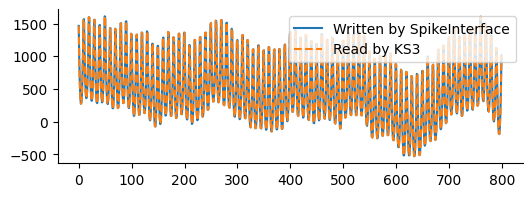

In [28]:
CONTACT = 0
duration = 20       # in ms
n_timepoints = int(duration*sampfreq/1000)

fig, ax = plt.subplots(1,1, figsize=(6,2));
plt.plot(resc_traces[:n_timepoints, CONTACT], label="Written by SpikeInterface");
plt.plot(raw_trace_first["buff"][CONTACT, :n_timepoints], label="Read by KS3", linestyle="--");
ax.spines[['right', 'top']].set_visible(False)
plt.legend();


Check that SpikeInterface output raw trace is same as raw trace read by Kilosort3

In [29]:
# read by Kilosort3
print("In Kilosort3:\n", raw_trace_first["buff"][0,:10])

# from SpikeInterface
WiredRecording = probe_wiring.load(data_conf_384)
raw_trace = WiredRecording.get_traces()
print("From SpikeInterface:\n", raw_trace[:10, 0])

In Kilosort3:
 [1463  959  604  379  274  286  414  662 1037 1557]
From SpikeInterface:
 [1463.5625   959.25     604.53125  379.25     274.5      286.28125
  414.3125   662.0156  1037.0938  1557.0781 ]


### Preprocessed

- pink (first neuropixels column), blue (second column), red (thrid column), black (fourth column)

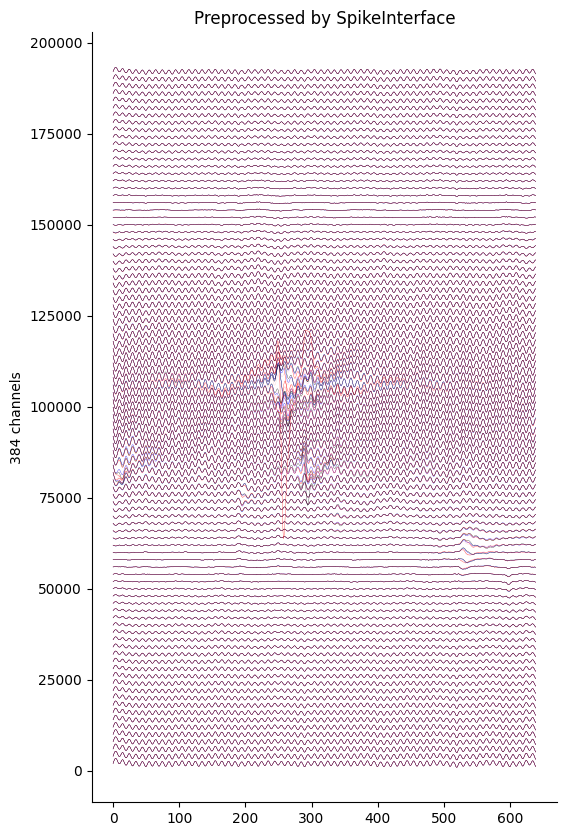

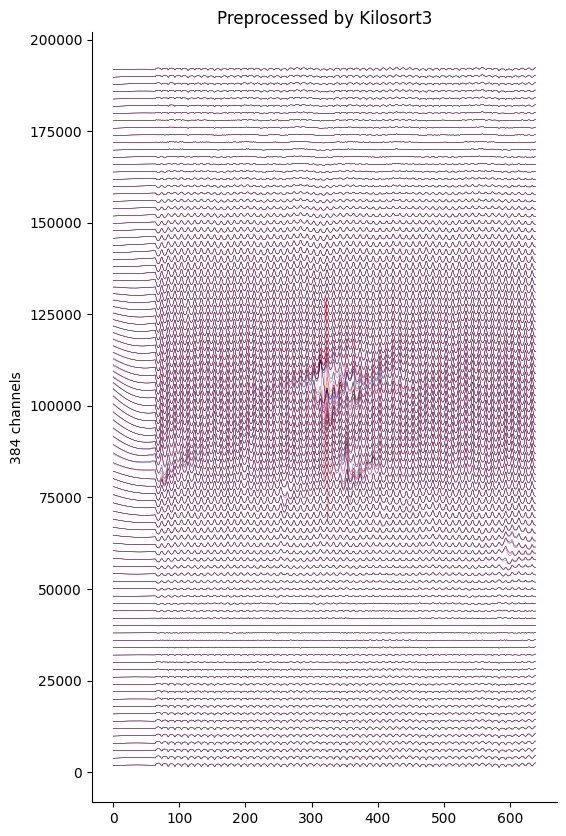

In [34]:
# BY SPIKEINTERFACE
Recording = preprocess.load(data_conf_384)
prep_traces = Recording.get_traces()

# plot
LINEWIDTH = 0.2
Y_STEP = 2000
Y_MAX = 200000

# get first batch of raw trace
prep_trace = scipy.io.loadmat(PREP_TRACE_BY_KS3_PATH)

# plot (traces in the same row across columns are at the same depth)

# plot 384 contacts x 5 ms (like Trautmann et al 2023)
sampfreq = 32000    # hz
duration = 20       # in ms
n_timepoints = int(duration*sampfreq/1000)

# plot 32 contacts (0: bottom 96:top)
fig, ax = plt.subplots(1,1, figsize=(6,10))
pos_up = 0
row = 0
for contact_i in np.arange(0,96,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_traces[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="pink");
ax.set_ylabel("96 channels");
#ax.set_ylim([np.min(prep_traces), Y_MAX]);

# plot 32 contacts (97: bottom 192:top)
pos_up = 0
row = 0
for contact_i in np.arange(96,192,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_traces[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="blue");

# plot 32 contacts (193: bottom 288:top)
pos_up = 0
row = 0
for contact_i in np.arange(192,288,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_traces[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="red");

# plot 32 contacts (289: bottom 384:top)
pos_up = 0
row = 0
for contact_i in np.arange(288,384,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_traces[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="black");

ax.set_ylabel("384 channels");
ax.set_title("Preprocessed by SpikeInterface");
ax.spines[['right', 'top']].set_visible(False)


# BY KILOSORT3

# plot
LINEWIDTH = 0.2
Y_STEP = 2000
Y_MAX = 200000

# get first batch of raw trace
prep_trace = scipy.io.loadmat(PREP_TRACE_BY_KS3_PATH)

# plot (traces in the same row across columns are at the same depth)

# plot 384 contacts x 5 ms (like Trautmann et al 2023)
sampfreq = 32000    # hz
duration = 20       # in ms
n_timepoints = int(duration*sampfreq/1000)

# plot 32 contacts (0: bottom 96:top)
fig, ax = plt.subplots(1,1, figsize=(6,10))
pos_up = 0
row = 0
for contact_i in np.arange(0,96,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_trace["prep"][:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="pink");
ax.set_ylabel("96 channels");

# plot 32 contacts (97: bottom 192:top)
pos_up = 0
row = 0
for contact_i in np.arange(96,192,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_trace["prep"][:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="blue");

# plot 32 contacts (193: bottom 288:top)
pos_up = 0
row = 0
for contact_i in np.arange(192,288,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_trace["prep"][:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="red");

# plot 32 contacts (289: bottom 384:top)
pos_up = 0
row = 0
for contact_i in np.arange(288,384,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_trace["prep"][:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="black");

ax.set_ylabel("384 channels");
ax.set_title("Preprocessed by Kilosort3");
ax.spines[['right', 'top']].set_visible(False)

# References

binary recording .dat is created here `spikeinterface.sorters.kilosortbase._setup_recording` with dtype `int16` called from `BaseSorter` in `Class Kilosort3Sorter(KilosortBase, BaseSorter)`

That's where matkab Kilosort3 is actually launched